This file creates a plot for each weekday, representing average amount of freestanding bikes found at given time

In [21]:
import json
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# If this is True, the plot will be crated for area surrounding Belwederska street
BELWEDERSKA = True

In [22]:
def two_hours_forward(timestamp_string: str):
    date, time = timestamp_string.split(' ')
    year, month, day = date.split('-')
    hour, minute, second = time.split(':')
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
    date += datetime.timedelta(hours=2)
    return date

In [23]:
# extracts weekday of datetime given in YYYY-MM-DD hh.mm.ss format
def get_weekday(timestamp_string: str):
    weekday_names_dict = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    extracted_date = timestamp_string[:10]
    date_list = extracted_date.split('-')
    year, month, day = int(date_list[0]), int(date_list[1]) , int(date_list[2])
    extracted_date = datetime.datetime(year, month, day)
    return weekday_names_dict[extracted_date.weekday()]

In [24]:
# extracts time of datetime given in YYYY-MM-DD hh.mm.ss format
def extract_time(timestamp_string: str):
    return timestamp_string[11:16].replace('.', ':')

In [25]:
def five_minutes_forward(given_time: str):
    hours = int(given_time[:2])
    minutes = int(given_time[3:])
    if minutes != 55:
        minutes += 5
        minutes = f"{minutes:02}"
    else:
        hours += 1
        minutes = '00'
    hours = f"{hours:02}"
    return str(hours) + ':' + str(minutes)

In [26]:
all_timestamps = {}
start = '00:00'
while start != '24:00':
    all_timestamps[start] = []
    start = five_minutes_forward(start)

timestamp_dictionary = dict()
data = {'monday': {},
        'tuesday': {},
        'wednesday': {},
        'thursday': {},
        'friday': {},
        'saturday': {},
        'sunday': {}}


for key in data.keys():
    all_timestamps = {}
    start = '00:00'
    while start != '24:00':
        all_timestamps[start] = []
        start = five_minutes_forward(start)
    data[key]['timestamps'] = all_timestamps

i = 0
timestamp = ''
# Extracting stations info for stations in Warsaw
with open('json_files/2024-july-aug-veturilo.json', 'r', encoding='utf8') as file:
    for line in file:
        # if i <= 3:
            # print(line)
            # print('-----')
        i += 1
        data_piece = json.loads(line)
        if str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.') != timestamp:
            timestamp = str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.')
            print(timestamp)
            weekday = get_weekday(timestamp[:10])
            time = extract_time(timestamp)
            data[weekday]['timestamps'][time].append(0)
        if data_piece['bike']:
            if not timestamp in timestamp_dictionary.keys():
                timestamp_dictionary[timestamp] = []
            timestamp_dictionary[timestamp].append(data_piece)
    

2024-06-30 00.00.00
2024-06-30 00.05.00
2024-06-30 00.10.00
2024-06-30 00.15.00
2024-06-30 00.20.00
2024-06-30 00.25.00
2024-06-30 00.30.00
2024-06-30 00.35.00
2024-06-30 00.40.00
2024-06-30 00.45.00
2024-06-30 00.50.00
2024-06-30 00.55.00
2024-06-30 01.00.00
2024-06-30 01.05.00
2024-06-30 01.10.00
2024-06-30 01.15.00
2024-06-30 01.20.00
2024-06-30 01.25.00
2024-06-30 01.30.00
2024-06-30 01.35.00
2024-06-30 01.40.00
2024-06-30 01.45.00
2024-06-30 01.50.00
2024-06-30 01.55.00
2024-06-30 02.00.00
2024-06-30 02.05.00
2024-06-30 02.10.00
2024-06-30 02.15.00
2024-06-30 02.20.00
2024-06-30 02.25.00
2024-06-30 02.30.00
2024-06-30 02.35.00
2024-06-30 02.40.00
2024-06-30 02.45.00
2024-06-30 02.50.00
2024-06-30 02.55.00
2024-06-30 03.00.00
2024-06-30 03.05.00
2024-06-30 03.10.00
2024-06-30 03.15.00
2024-06-30 03.20.00
2024-06-30 03.25.00
2024-06-30 03.30.00
2024-06-30 03.35.00
2024-06-30 03.40.00
2024-06-30 03.45.00
2024-06-30 03.50.00
2024-06-30 03.55.00
2024-06-30 04.00.00
2024-06-30 04.05.00


In [27]:
data

{'monday': {'timestamps': {'00:00': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:05': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:10': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:15': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:20': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:25': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:30': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:35': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:40': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:45': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:50': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '00:55': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:00': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:05': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:10': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:15': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:20': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:25': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:30': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:35': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:40': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:45': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:50': [0, 0, 0, 0, 0, 0, 0, 0, 0],
   '01:55': [0, 0, 0, 0, 0, 0, 0,

In [28]:
replacement_data = {'monday': {},
        'tuesday': {},
        'wednesday': {},
        'thursday': {},
        'friday': {},
        'saturday': {},
        'sunday': {}}

for timestamp in timestamp_dictionary:
    date = timestamp[:10]
    weekday = get_weekday(date)
    time = timestamp[11:16].replace('.', ':')
    if time not in replacement_data[weekday].keys():
        replacement_data[weekday][time] = [len(timestamp_dictionary[timestamp])]
    else:
        replacement_data[weekday][time].append(len(timestamp_dictionary[timestamp]))

for weekday in replacement_data:
    for time in replacement_data[weekday]:
        added_positions = len(replacement_data[weekday][time])
        data[weekday]['timestamps'][time] += replacement_data[weekday][time]
        for i in range(added_positions):
            data[weekday]['timestamps'][time].remove(0)

In [29]:
data

{'monday': {'timestamps': {'00:00': [40, 33, 55, 38, 31, 47, 39, 39, 39],
   '00:05': [41, 34, 53, 35, 32, 48, 39, 36, 40],
   '00:10': [41, 34, 52, 36, 34, 45, 40, 36, 41],
   '00:15': [39, 35, 53, 36, 34, 42, 41, 36, 41],
   '00:20': [37, 33, 51, 36, 34, 41, 39, 39, 41],
   '00:25': [37, 37, 52, 38, 33, 45, 41, 36, 43],
   '00:30': [37, 35, 51, 40, 32, 42, 40, 37, 43],
   '00:35': [37, 36, 48, 39, 33, 45, 39, 38, 42],
   '00:40': [37, 33, 49, 40, 33, 45, 39, 38, 42],
   '00:45': [38, 35, 49, 43, 33, 45, 39, 37, 42],
   '00:50': [44, 36, 51, 43, 33, 47, 40, 36, 42],
   '00:55': [40, 38, 52, 43, 35, 48, 40, 37, 42],
   '01:00': [39, 39, 50, 39, 32, 49, 41, 37, 41],
   '01:05': [38, 37, 48, 42, 34, 49, 40, 36, 42],
   '01:10': [37, 39, 47, 41, 33, 51, 40, 35, 41],
   '01:15': [35, 37, 46, 44, 33, 51, 35, 36, 41],
   '01:20': [34, 37, 46, 42, 33, 47, 34, 34, 41],
   '01:25': [33, 33, 46, 43, 33, 48, 33, 34, 41],
   '01:30': [34, 34, 52, 42, 36, 50, 32, 34, 42],
   '01:35': [36, 34, 49, 4

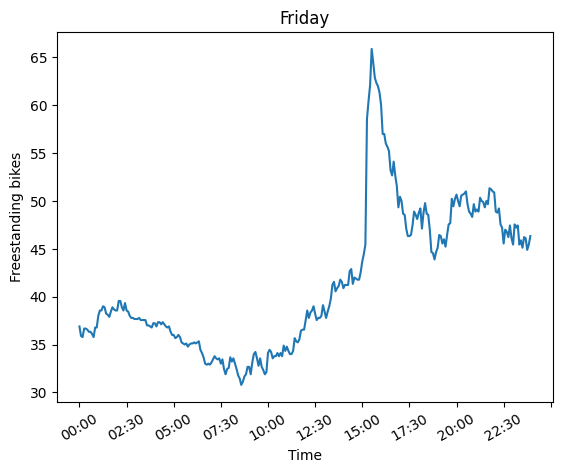

In [30]:
di1 = []
di2 = []
for key, value in data['friday']['timestamps'].items():
    di1.append(key)
    di2.append(sum(value)/len(value))
    
plt.plot(di1, di2)
plt.title("Friday")
plt.xlabel("Time")
plt.ylabel("Freestanding bikes")
plt.tick_params(axis='x', labelrotation = 30)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=11))
plt.show()